<a href="https://colab.research.google.com/github/magooyluissalba-bit/Estadistica2025B/blob/main/energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Estadistica2025BB/Estadistica2025B/refs/heads/main/test_energy_data.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [ ]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [ ]:
df.columns = ['tipo_edificio', 'pies_cuadrados', 'numero_ocupantes',
       'accesorios_usados', 'promedio_temperatura', 'dia_semana',
       'energia_consumida']
df

,tipo_edificio,pies_cuadrados,numero_ocupantes,accesorios_usados,promedio_temperatura,dia_semana,energia_consumida
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols('energia_consumida ~ C(tipo_edificio) + pies_cuadrados + numero_ocupantes + accesorios_usados + promedio_temperatura + C(dia_semana)',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(tipo_edificio),2.0,1.478319e+07,7.391595e+06,3.746118e+10,0.000000e+00
C(dia_semana),1.0,2.727974e+06,2.727974e+06,1.382558e+10,0.000000e+00
pies_cuadrados,1.0,3.387918e+07,3.387918e+07,1.717023e+11,0.000000e+00
numero_ocupantes,1.0,9.275636e+06,9.275636e+06,4.700965e+10,0.000000e+00
accesorios_usados,1.0,7.842723e+06,7.842723e+06,3.974753e+10,0.000000e+00
promedio_temperatura,1.0,1.137355e+05,1.137355e+05,5.764203e+08,1.815926e-314
Residual,92.0,1.815284e-02,1.973135e-04,NaN,NaN


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2    meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
Commercial  Industrial   94.8042  0.877  -367.1835  556.7919  False
Commercial Residential -727.5898 0.0006 -1174.3106 -280.8689   True
Industrial Residential  -822.394    0.0 -1236.0386 -408.7494   True
-------------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

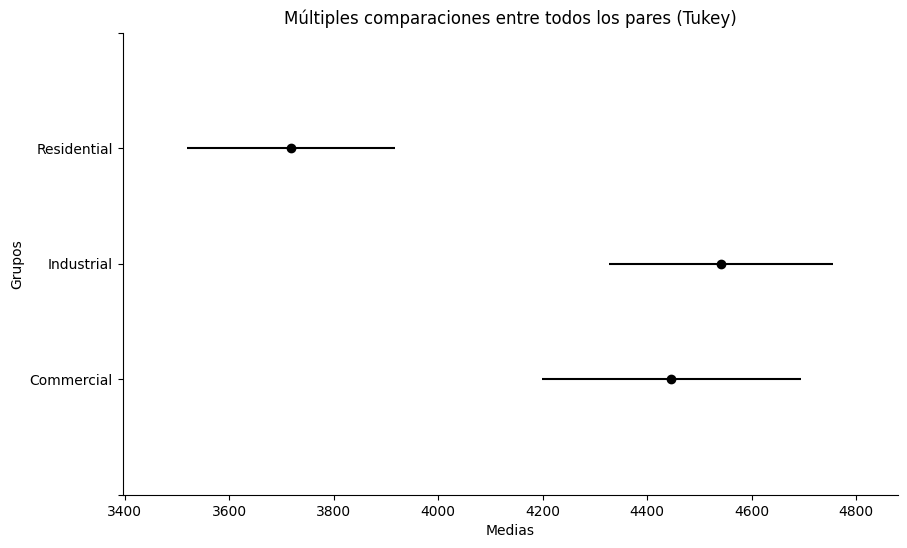

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['energia_consumida'], groups=df['tipo_edificio'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
Weekday Weekend -282.6771 0.092 -612.3796 47.0253  False
--------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

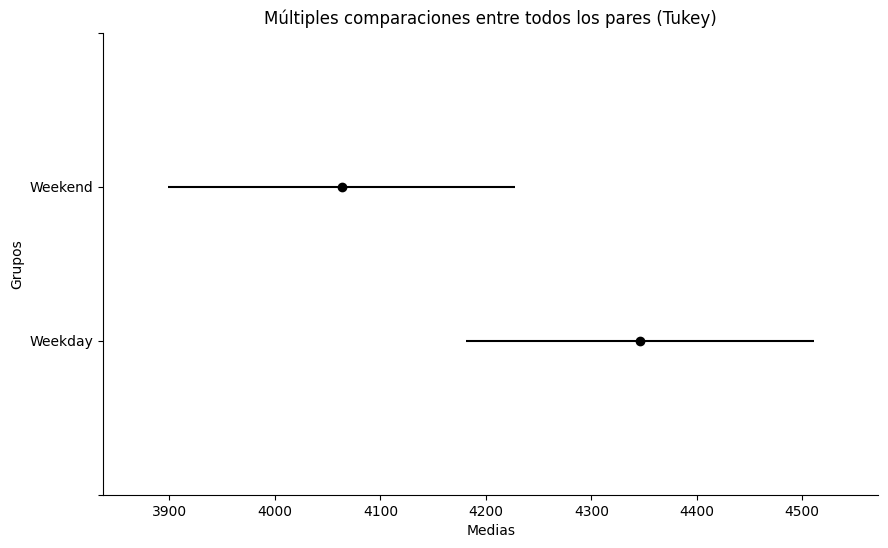

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['energia_consumida'], groups=df['dia_semana'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["tipo_edificio"]= df["tipo_edificio"].map({"Residential":0, "Commercial":1, "Industrial": 1})
df

,tipo_edificio,pies_cuadrados,numero_ocupantes,accesorios_usados,promedio_temperatura,dia_semana,energia_consumida
0,0,24563,15,4,28.52,Weekday,2865.57
1,1,27583,56,23,23.07,Weekend,4283.80
2,1,45313,4,44,33.56,Weekday,5067.83
3,0,41625,84,17,27.39,Weekend,4624.30
4,0,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,Weekend,3010.81
96,0,37943,50,23,21.73,Weekend,4248.49
97,1,1558,27,29,16.86,Weekend,2843.60
98,1,2145,56,12,11.77,Weekend,3348.39


In [ ]:
df["dia_semana"]= df["dia_semana"].map({"Weekday":0, "Weekend":1})
df

,tipo_edificio,pies_cuadrados,numero_ocupantes,accesorios_usados,promedio_temperatura,dia_semana,energia_consumida
0,0,24563,15,4,28.52,0,2865.57
1,1,27583,56,23,23.07,1,4283.80
2,1,45313,4,44,33.56,0,5067.83
3,0,41625,84,17,27.39,1,4624.30
4,0,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,1,1161,81,11,15.45,1,3010.81
96,0,37943,50,23,21.73,1,4248.49
97,1,1558,27,29,16.86,1,2843.60
98,1,2145,56,12,11.77,1,3348.39


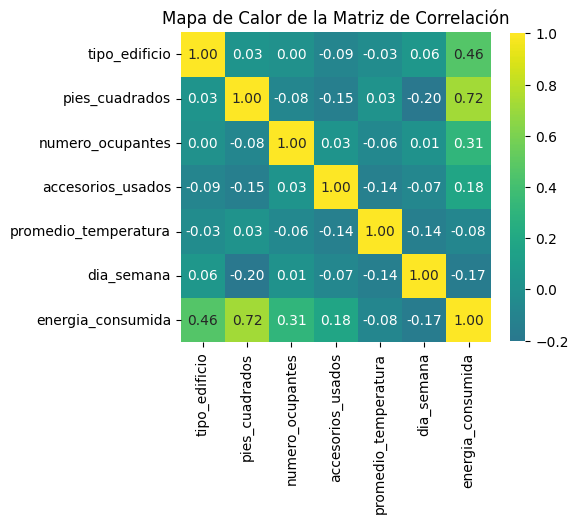

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [ ]:
x = df[['tipo_edificio', 'pies_cuadrados', 'numero_ocupantes',
       'accesorios_usados', 'promedio_temperatura', 'dia_semana']]
y = df["energia_consumida"]

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
residuales = modelo.resid # Moved this line up to define residuales before use

# plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?

# residuales = modelo.resid # Original location

# plt.figure()
# plt.scatter(x["tipo_edificio"], residuales, color = '#008B8B')
# plt.xlabel('tipo_edificio', fontsize = 12)
# plt.ylabel('energia_consumida', fontsize = 12)
# plt.axhline(y = 0, color = 'gray', linestyle = '--')
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.title("Residuales Edificio", fontsize = 16)



# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('energia_consumida ~ C(tipo_edificio) + pies_cuadrados + numero_ocupantes + accesorios_usados + promedio_temperatura + C(dia_semana)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.9492

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
C(tipo_edificio),1.0,1.465077e+07,1.465077e+07,390.932271,4.505735e-35
C(dia_semana),1.0,2.644622e+06,2.644622e+06,70.567499,4.906707e-13
pies_cuadrados,1.0,3.204442e+07,3.204442e+07,855.054076,1.122464e-48
numero_ocupantes,1.0,9.137672e+06,9.137672e+06,243.824123,9.889547e-28
accesorios_usados,1.0,6.610281e+06,6.610281e+06,176.384738,3.374596e-23
promedio_temperatura,1.0,4.935299e+04,4.935299e+04,1.316905,2.540917e-01
Residual,93.0,3.485313e+06,3.747649e+04,NaN,NaN


In [ ]:
modelo.params

,0
const,1628.057545
tipo_edificio,781.748439
pies_cuadrados,0.047290
numero_ocupantes,9.944151
accesorios_usados,18.262706
promedio_temperatura,-3.287387
dia_semana,-41.469258


Text(0.5, 1.0, 'Residuales Edificio')

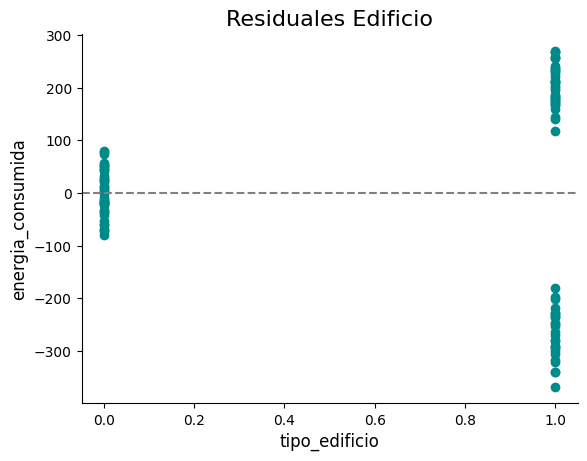

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["tipo_edificio"], residuales, color = '#008B8B')
plt.xlabel('tipo_edificio', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Edificio", fontsize = 16)

Text(0.5, 1.0, 'Residuales Pies Cuadrados')

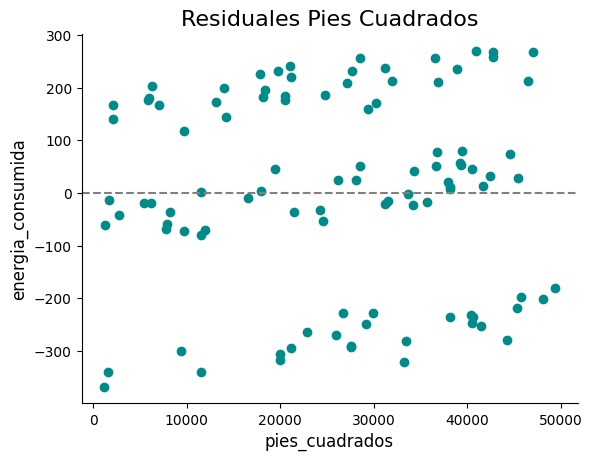

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["pies_cuadrados"], residuales, color = '#008B8B')
plt.xlabel('pies_cuadrados', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Pies Cuadrados", fontsize = 16)

Text(0.5, 1.0, 'Residuales Número Ocupantes ')

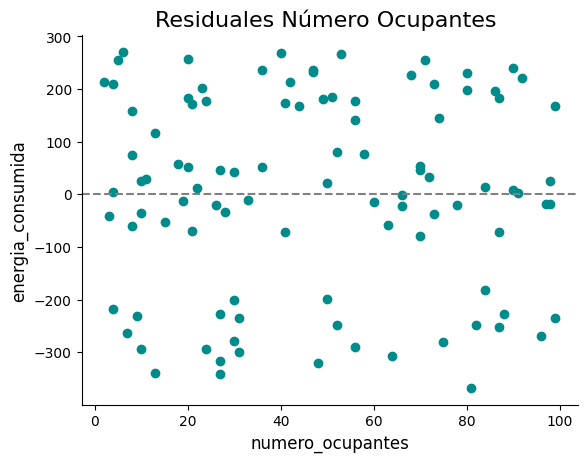

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["numero_ocupantes"], residuales, color = '#008B8B')
plt.xlabel( 'numero_ocupantes', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Número Ocupantes ", fontsize = 16)

Text(0.5, 1.0, 'Residuales Accesorios Usados')

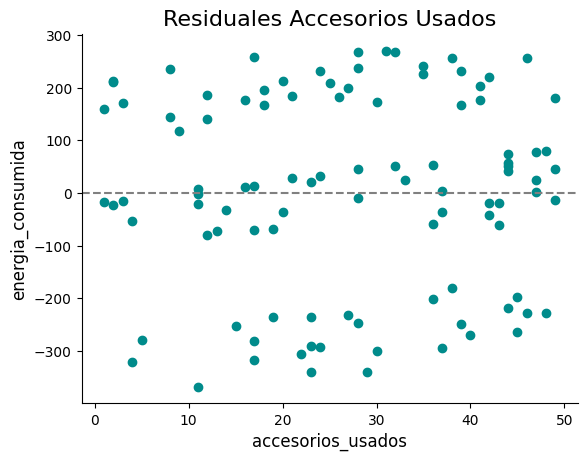

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["accesorios_usados"], residuales, color = '#008B8B')
plt.xlabel('accesorios_usados', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Accesorios Usados", fontsize = 16)

Text(0.5, 1.0, 'Residuales Promedio Temperatura')

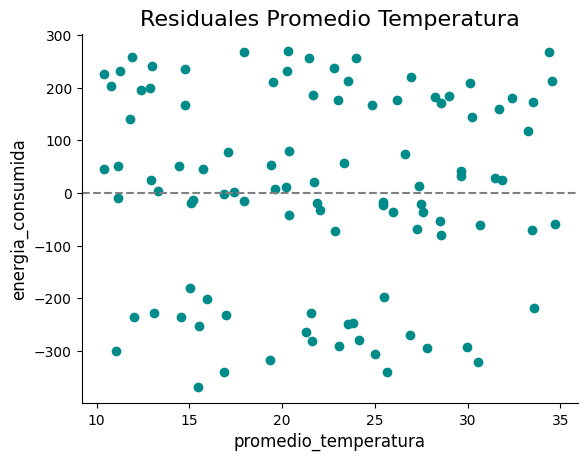

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["promedio_temperatura"], residuales, color = '#008B8B')
plt.xlabel( 'promedio_temperatura', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Promedio Temperatura", fontsize = 16)

Text(0.5, 1.0, 'Residuales Promedio Temperatura')

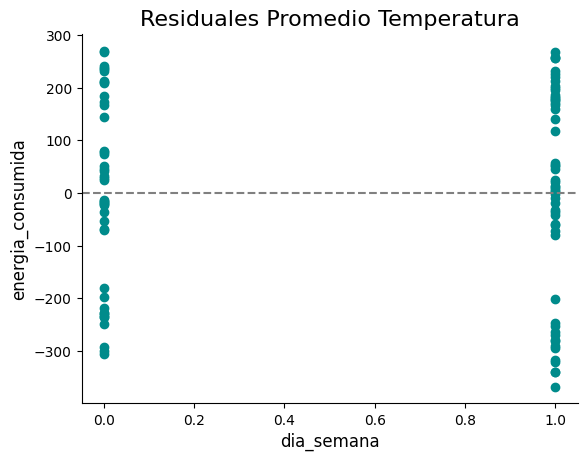

In [ ]:
residuales = modelo.resid
plt.figure()
plt.scatter(x["dia_semana"], residuales, color = '#008B8B')
plt.xlabel( 'dia_semana', fontsize = 12)
plt.ylabel('energia_consumida', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales Promedio Temperatura", fontsize = 16)